In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


In [3]:
#Step 1: Load the data
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

X_train = train_df.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = train_df.iloc[:, 0].values.reshape(-1, 1)

X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values.reshape(-1, 1)

In [5]:
# Step 2: One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_oh = encoder.fit_transform(y_train)
y_test_oh = encoder.transform(y_test)


In [7]:
# Step 3: Initialize weights for a simple neural network
input_size = 784
hidden_size = 128
output_size = 10

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def compute_loss(y_true, y_pred):
    epsilon = 1e-10
    return -np.mean(np.sum(y_true * np.log(y_pred + epsilon), axis=1))


In [9]:
# Step 4: Train the model
epochs = 100
learning_rate = 0.1
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # Loss
    loss = compute_loss(y_train_oh, A2)
    losses.append(loss)

    # Backward pass
    dZ2 = A2 - y_train_oh
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")


Epoch 1/100 - Loss: 2.3018
Epoch 2/100 - Loss: 2.2986
Epoch 3/100 - Loss: 2.2954
Epoch 4/100 - Loss: 2.2919
Epoch 5/100 - Loss: 2.2882
Epoch 6/100 - Loss: 2.2842
Epoch 7/100 - Loss: 2.2796
Epoch 8/100 - Loss: 2.2745
Epoch 9/100 - Loss: 2.2687
Epoch 10/100 - Loss: 2.2620
Epoch 11/100 - Loss: 2.2545
Epoch 12/100 - Loss: 2.2459
Epoch 13/100 - Loss: 2.2362
Epoch 14/100 - Loss: 2.2253
Epoch 15/100 - Loss: 2.2130
Epoch 16/100 - Loss: 2.1993
Epoch 17/100 - Loss: 2.1841
Epoch 18/100 - Loss: 2.1674
Epoch 19/100 - Loss: 2.1491
Epoch 20/100 - Loss: 2.1292
Epoch 21/100 - Loss: 2.1076
Epoch 22/100 - Loss: 2.0843
Epoch 23/100 - Loss: 2.0593
Epoch 24/100 - Loss: 2.0325
Epoch 25/100 - Loss: 2.0041
Epoch 26/100 - Loss: 1.9742
Epoch 27/100 - Loss: 1.9429
Epoch 28/100 - Loss: 1.9106
Epoch 29/100 - Loss: 1.8775
Epoch 30/100 - Loss: 1.8440
Epoch 31/100 - Loss: 1.8105
Epoch 32/100 - Loss: 1.7773
Epoch 33/100 - Loss: 1.7447
Epoch 34/100 - Loss: 1.7128
Epoch 35/100 - Loss: 1.6819
Epoch 36/100 - Loss: 1.6519
E

In [11]:
# Step 5: Evaluate on test data
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = softmax(Z2_test)

y_pred_test = np.argmax(A2_test, axis=1)
y_true_test = y_test.flatten()

acc = accuracy_score(y_true_test, y_pred_test)
print(f"\nTest Accuracy: {acc:.4f}")



Test Accuracy: 0.6646


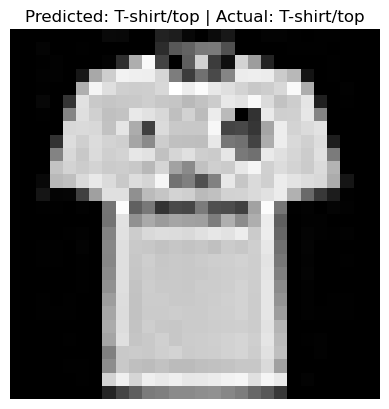

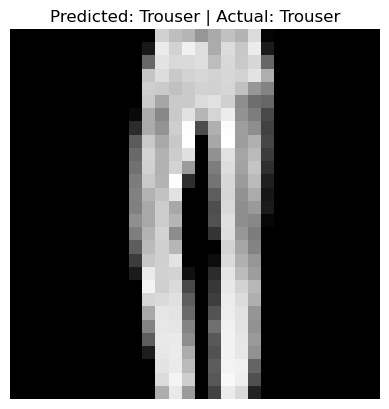

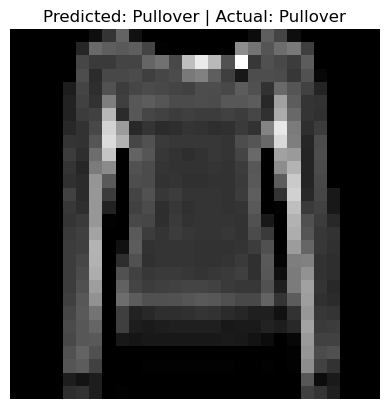

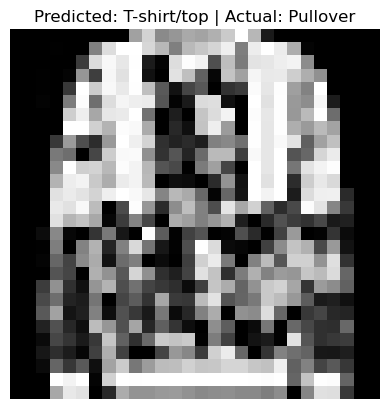

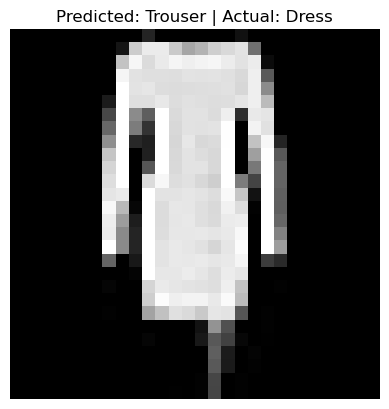

In [13]:
# Step 6: Visualize sample predictions
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(5):
    img = X_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {label_names[y_pred_test[i]]} | Actual: {label_names[y_true_test[i]]}")
    plt.axis('off')
    plt.show()